## Observations and Insights 

In [14]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import os
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data file paths
mouse_metadata_path=os.path.join('data','Mouse_metadata.csv')
study_results_path=os.path.join('data','Study_results.csv')

# Read the mouse data and the study results as dataframes
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single datase
full_mice_study_df=study_results_df.merge(mouse_metadata_df,how='left',on='Mouse ID')

# Display the data table for preview
full_mice_study_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [15]:
# Number of unique mice IDs in the full dataset
full_mice_count=len(full_mice_study_df['Mouse ID'].value_counts())
print(f'There are {full_mice_count} unique Mouse IDs in the full dataset.')

There are 249 unique Mouse IDs in the full dataset.


In [16]:
# Getting the duplicate mice by ID number based Mouse ID and Timepoint. 
duplicate_mice_filter=full_mice_study_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)==True

#Finding the Mouse ID that has 
duplicate_mice_study_df=full_mice_study_df.loc[duplicate_mice_filter,:]
duplicate_mice_ID=duplicate_mice_study_df['Mouse ID'].unique()
# duplicate_mice_ID

# Getting the unique mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice_filter=full_mice_study_df['Mouse ID'].isin(duplicate_mice_ID)==False

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice_study_df=full_mice_study_df.loc[unique_mice_filter,:]
unique_mice_study_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [18]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count=len(unique_mice_study_df['Mouse ID'].unique())
print(f'There are {unique_mice_count} unique Mouse IDs in the clean dataset.')

There are 248 unique Mouse IDs in the clean dataset.


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

drug_reg_group=unique_mice_study_df[['Tumor Volume (mm3)','Drug Regimen']].groupby('Drug Regimen')

# Mean
mean_tumor_vol = drug_reg_group['Tumor Volume (mm3)'].mean()
# print(f'Mean Tumor Volume: {mean_tumor_vol}')

# Median 
median_tumor_vol = drug_reg_group['Tumor Volume (mm3)'].median()
# print(f'Median Tumor Volume: {median_tumor_vol}')

# Variance 
var_tumor_vol = drug_reg_group['Tumor Volume (mm3)'].var()
# print(f"The population variance using the NumPy module is {var_tumor_vol}")

# Standard Deviation
sd_tumor_vol = drug_reg_group['Tumor Volume (mm3)'].std()
# print(f"The population standard deviation using the NumPy module is {sd_tumor_vol}")

# SEM
sem_tumor_vol=drug_reg_group['Tumor Volume (mm3)'].sem()
# print(f"The population standard error of the mean using the SciPy module is {sem_tumor_vol}")

# Assemble the resulting series into a single summary dataframe.
drug_reg_columns={'Mean Tumor Volume (mm3)': mean_tumor_vol,
                  'Median Tumor Volume (mm3)': median_tumor_vol,
                  'Tumor Volume Variance': var_tumor_vol,
                  'Tumor Volume Standard Deviation': sd_tumor_vol,
                  'Tumor Volume Standard Error of the Mean': sem_tumor_vol}

drug_reg_df=pd.DataFrame(drug_reg_columns)

drug_reg_df.head(len(drug_reg_df))

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
#Observation 1: Ramicane appears to be the most effective drug regimen, resulting in the smallest average tumor size with the sample also having the smallest standard deviation. 

In [27]:
# #Summary statistics table for mean, median, variance, standard deviation and standard errof of the mean using the aggregation methos
drug_reg_agg_df=unique_mice_study_df[['Tumor Volume (mm3)',
                                      'Drug Regimen']].groupby('Drug Regimen').agg(['mean',
                                                                                    'median',
                                                                                    'var',
                                                                                    'std',
                                                                                    'sem'])

#Cleanup summary statistics columns
drug_reg_agg_df.columns.set_levels(['Mean',
                                    'Median',
                                    'Variance',
                                    'Standard Deviation',
                                    'Standard Error of the Mean'],level=1,inplace=True)

drug_reg_agg_df.head(10)

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.320930  50.446266  43.852013           6.622085   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                                         
             Standard Error of the Mean  
Drug Regimen                             
Capomulin                      0.329346  
Ceftamin                       0.469821  
Infubinol                      0.492236  
Ketapril                       0.603860  
Naftisol                       0.596466  
Placebo                        0.581331  
Propriva                       0.544332  
Ramicane                       0.320955  
Stelasyn                       0.573111  
Zoniferol                      0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

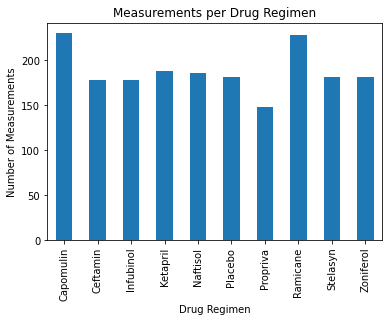

In [25]:
# Bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Not ethat this does not show the number of unique mice on each drug regimen
regimen_measurement_df=unique_mice_study_df.groupby('Drug Regimen')['Mouse ID'].count()
regimen_measurement_df.plot(kind='bar')

plt.title("Measurements per Drug Regimen")
plt.ylabel('Number of Measurements')

Text(0, 0.5, 'Number of Measurements')

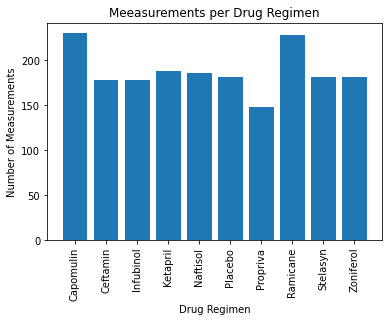

In [28]:
# Bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_measurement_group=unique_mice_study_df.groupby('Drug Regimen').count
regimen_measurement_df

y=regimen_measurement_df

x=list(regimen_measurement_df.index)

plt.bar(x,y)
plt.title("Meeasurements per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Measurements')

Text(0.5, 1.0, 'Mice Gender Distribution')

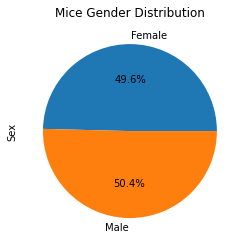

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=unique_mice_study_df.groupby('Sex')
gender_df=gender_group['Mouse ID'].nunique()
gender_df

gender_df.plot(kind='pie',ylabel='Sex',autopct="%1.1f%%")

plt.title("Mice Gender Distribution")
# plt.ylabel('Number of Measurements')


Text(0, 0.5, 'Sex')

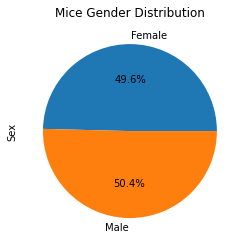

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df=unique_mice_study_df.groupby('Sex')['Mouse ID'].nunique()

labels=list(gender_df.index)

values=list(gender_df)

plt.pie(values,labels=labels, autopct="%1.1f%%")
plt.title("Mice Gender Distribution")
plt.ylabel('Sex')

In [ ]:
#Observation 2: The distribution of male and female mice is nearly 50/50, indicating that on average, the results hold true for moth male and femal mice

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimen_list=['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
drug_filter=unique_mice_study_df.loc[:,'Drug Regimen'].isin(drug_regimen_list)
drug_filter

drug_study_df=unique_mice_study_df.loc[drug_filter,:]

# Start by getting the last (greatest) timepoint for each mouse
end_timepoint=drug_study_df.groupby("Mouse ID")['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_study_end_time_df=pd.merge(end_timepoint,drug_study_df,on=('Mouse ID','Timepoint'))

end_tumor_vol_df=drug_study_end_time_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen','Sex','Weight (g)']]
end_tumor_vol_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex,Weight (g)
0,a203,45,67.973419,Infubinol,Female,23
1,a251,45,65.525743,Infubinol,Female,25
2,a275,45,62.999356,Ceftamin,Female,28
3,a411,45,38.407618,Ramicane,Male,22
4,a444,45,43.047543,Ramicane,Female,25
5,a520,45,38.810366,Ramicane,Male,21
6,a577,30,57.031862,Infubinol,Female,25
7,a644,45,32.978522,Ramicane,Female,17
8,a685,45,66.083066,Infubinol,Male,30
9,b128,45,38.982878,Capomulin,Female,22


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list=['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

for drug in drug_regimen_list:
    drug_filter=end_tumor_vol_df.loc[:,'Drug Regimen']==drug

    drug_study_df=end_tumor_vol_df.loc[drug_filter,'Tumor Volume (mm3)']
    
    tumor_volume.append(drug_study_df)
    
    quartiles=drug_study_df.quantile([.25,.5,.75])
    
    quartile_25=quartiles[.25]
    quartile_50=quartiles[.50]
    quartile_75=quartiles[.75]
    
    iqr=quartile_75-quartile_25
    
    lower_bound=quartile_25-(1.5*iqr)
    upper_bound=quartile_75+(1.5*iqr)
    
    outliers_filter=(drug_study_df<lower_bound)|(drug_study_df>upper_bound)
    
    outliers=drug_study_df.loc[outliers_filter]
    
    if len(outliers)>0:
        print(f'{drug} has potential outliers of: {outliers}')
    else:
        print(f'{drug} has no potential outliers')

Capomulin has no potential outliers
Ceftamin has no potential outliers
Infubinol has potential outliers of: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane has no potential outliers


<ipython-input-46-049d766da01e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drug_regimen_list)


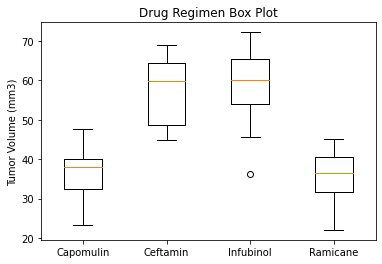

In [46]:
# Box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax = plt.subplots()
ax.set_title('Drug Regimen Box Plot')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(drug_regimen_list)
ax.boxplot(tumor_volume)
plt.show()

In [ ]:
#Observation 2: Infubinol was the only data set that had an outlier that falls below the lower bound, while the remaining three drug regimens produced results within the lower and upper bounds.

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

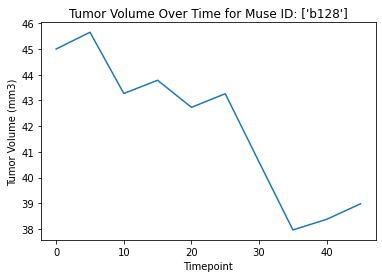

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_ID_list=['b128']

drug_mouse_filter=unique_mice_study_df.loc[:,'Mouse ID'].isin(mouse_ID_list)
drug_mouse_filter

drug_mouse_df=unique_mice_study_df.loc[drug_mouse_filter,:]

x=drug_mouse_df['Timepoint']
y=drug_mouse_df['Tumor Volume (mm3)']

plt.plot(x,y)
plt.title(f'Tumor Volume Over Time for Muse ID: {mouse_ID_list}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

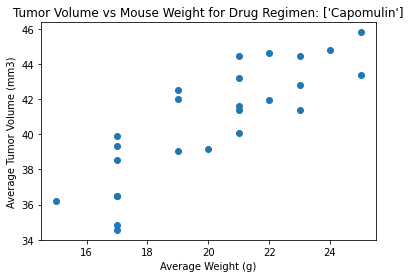

In [40]:
# Scatter plot of average tumor volume vs. AVERAGE mouse weight for the Capomulin regimen

reg_list=['Capomulin']
reg_filter=unique_mice_study_df.loc[:,'Drug Regimen'].isin(reg_list)

reg_study_df=unique_mice_study_df.loc[reg_filter,:]

mouse_group=reg_study_df.groupby('Mouse ID')
avg_mouse_weight=mouse_group['Weight (g)'].mean()
avg_mouse_tumor_vol=mouse_group['Tumor Volume (mm3)'].mean()
                                                    
x_reg=avg_mouse_weight
y_reg=avg_mouse_tumor_vol

plt.scatter(x_reg,y_reg)
plt.title(f'Tumor Volume vs Mouse Weight for Drug Regimen: {reg_list}')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

Text(18, 36, 'Correlation Coefficient: 0.84')

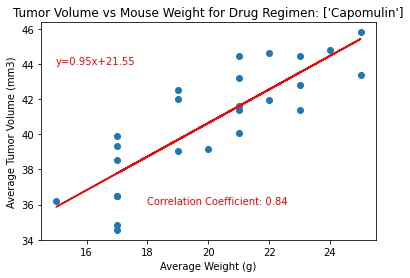

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr=linregress(x_reg, y_reg)
regression_eq = slope*x_reg + intercept
regression_label=(f'y={round(slope,2)}x+{round(intercept,2)}')

plt.scatter(x_reg,y_reg)
plt.title(f'Tumor Volume vs Mouse Weight for Drug Regimen: {reg_list}')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(x_reg,regression_eq,"r-")
plt.annotate(regression_label,(15,44),color="red")

plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}',(18,36),color="red")

In [ ]:
#Observation 4: There is a positive correlation between the mouse weight and the size of the tumor (the heavier in weigh the mouse is, the larger the tumor).